In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split as tts,GridSearchCV,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df = pd.read_csv('deforestation_dataset.csv')
df = df.dropna()
df['Country'] = df['Country'].astype('category').cat.codes
df['Illegal_Corrupt'] = df['Corruption_Index']*df['Illegal_Lumbering_Incidents']
df['CO2_per_Capita'] = df['CO2_Emission_mt']/df['Population']

scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled,columns=df.columns)
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent,Illegal_Corrupt,CO2_per_Capita
0,0.581633,-0.095493,-1.435847,1.353354,0.412992,-0.611514,1.427134,0.020789,1.656028,0.367855,-1.328220,-0.070580,1.360924,-1.353582,-0.684902,-0.424457
1,-0.836985,-1.544360,0.702287,-0.381103,0.694820,-0.925249,1.321640,0.081370,-1.378318,1.243702,-1.567884,1.178629,-0.389567,0.337820,-1.069961,-0.390013
2,1.290942,-0.424781,1.608830,-0.364583,0.367290,-0.422713,-0.185985,0.252244,0.684164,-0.507991,0.164175,-0.431463,-0.868475,0.688477,-0.481359,-0.200211
3,-1.546294,-0.227209,0.979005,-1.635268,0.268270,-0.774312,0.882666,0.002291,-1.606142,1.243702,-0.826316,-0.403703,-1.644635,0.682478,-1.109078,-0.395004
4,-1.546294,0.431367,0.218225,0.992090,1.525069,-0.408543,-1.084459,-1.346385,-1.353690,1.243702,-0.906827,-0.618845,-1.000587,0.083757,-0.900145,1.048569


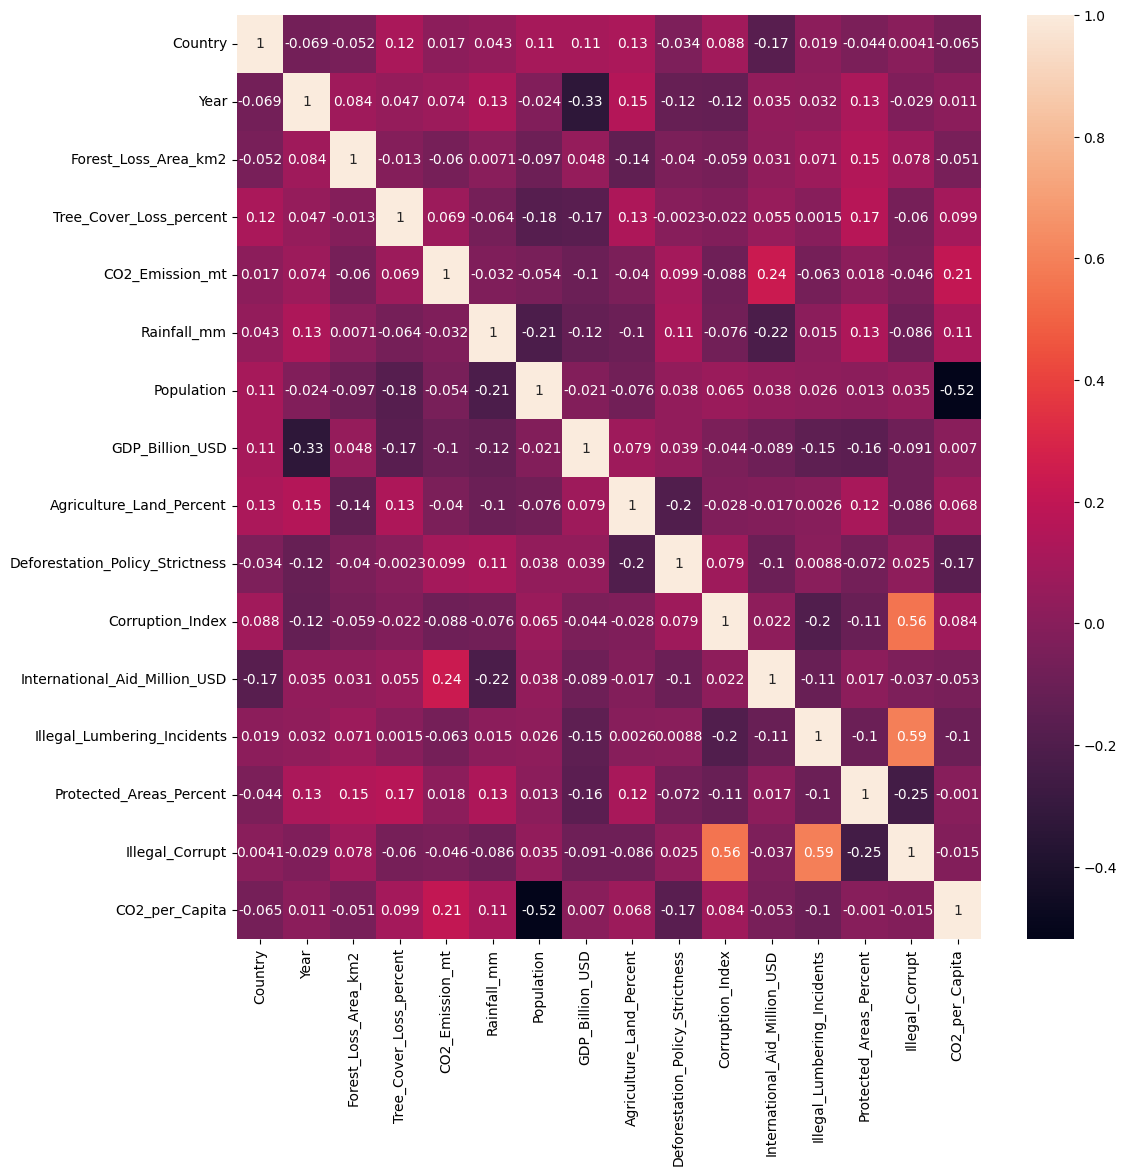

In [3]:
plt.figure(figsize=(12,12))
cg = sb.heatmap(df.corr(),annot=True)

In [4]:
x = df.drop(['Forest_Loss_Area_km2','Corruption_Index','Illegal_Lumbering_Incidents','CO2_Emission_mt','Population'],axis=1)
y = df['Forest_Loss_Area_km2']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=42)

1.472310530001805
0.9925444593987374
1.2133880376869572
-1.2662521783039038


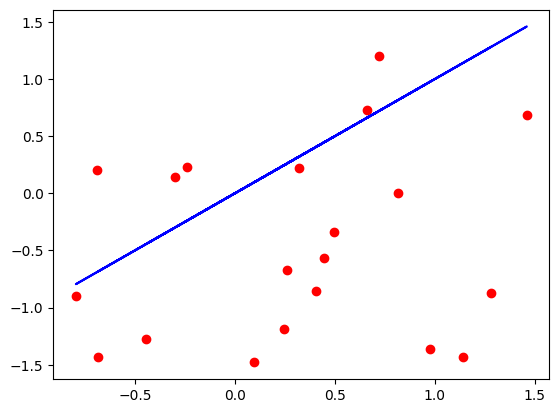

In [5]:
svr1 = SVR(C=1,kernel='linear')
svr1.fit(x_train,y_train)
y_pred1 = svr1.predict(x_test)

print(mean_squared_error(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))
print(root_mean_squared_error(y_test,y_pred1))
print(r2_score(y_test,y_pred1))
plt.scatter(y_pred1,y_test,color='red')
plt.plot(y_pred1,y_pred1,color='blue')

For Fold 1:
Best Parameters {'C': 1, 'epsilon': 1, 'gamma': 10, 'kernel': 'rbf'}
1.0111023562484198
0.8364269219709154
1.0055358552773839
-0.5563380622791456


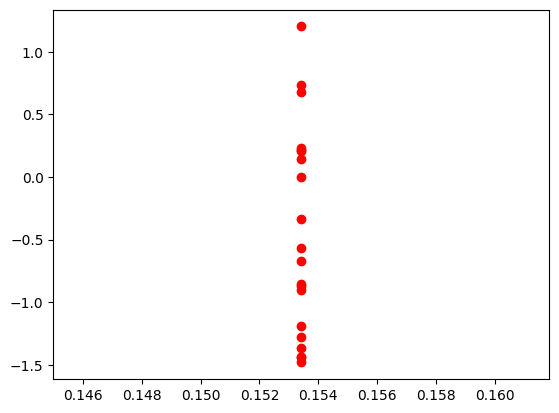

CO2_per_Capita                  : 0.0000
Country                         : 0.0000
Illegal_Corrupt                 : 0.0000
Year                            : 0.0000
International_Aid_Million_USD   : 0.0000
Agriculture_Land_Percent        : 0.0000
Deforestation_Policy_Strictness : 0.0000
GDP_Billion_USD                 : -0.0000
Protected_Areas_Percent         : -0.0000
Rainfall_mm                     : -0.0000
Tree_Cover_Loss_percent         : -0.0000

For Fold 2:
Best Parameters {'C': 0.1, 'epsilon': 0.5, 'gamma': 1, 'kernel': 'poly'}
2.9523588431130143
1.2666530691639115
1.7182429522954588
-3.544414729772706


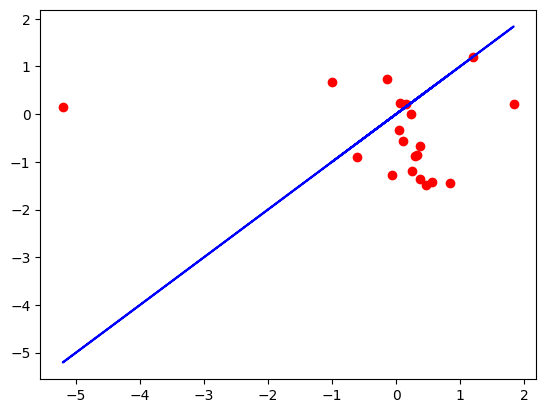

Tree_Cover_Loss_percent         : 1.0721
Illegal_Corrupt                 : 0.1415
Rainfall_mm                     : 0.1267
Protected_Areas_Percent         : -0.2478
Year                            : -0.2555
International_Aid_Million_USD   : -0.3277
GDP_Billion_USD                 : -0.4929
Country                         : -0.5215
Deforestation_Policy_Strictness : -0.5485
CO2_per_Capita                  : -0.7887
Agriculture_Land_Percent        : -0.9519

For Fold 3:
Best Parameters {'C': 5, 'epsilon': 1, 'gamma': 0.1, 'kernel': 'rbf'}
1.050313644783057
0.8681800135188229
1.0248481081521579
-0.6166939900844135


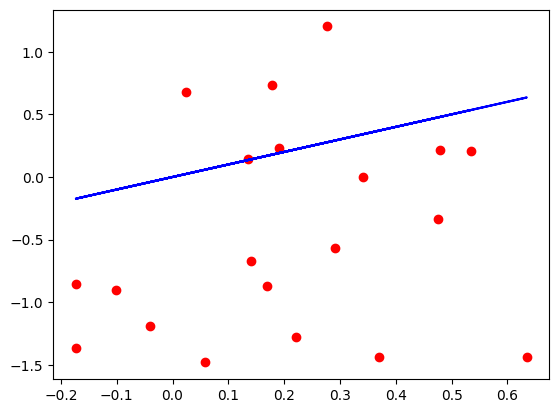

Year                            : 0.1057
GDP_Billion_USD                 : 0.0800
Country                         : 0.0626
Tree_Cover_Loss_percent         : 0.0377
Protected_Areas_Percent         : 0.0105
CO2_per_Capita                  : -0.0050
Deforestation_Policy_Strictness : -0.0068
Agriculture_Land_Percent        : -0.0093
International_Aid_Million_USD   : -0.0146
Illegal_Corrupt                 : -0.0273
Rainfall_mm                     : -0.0749

For Fold 4:
Best Parameters {'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
0.9272378517982991
0.816238844645628
0.9629319040297185
-0.42724972661925587


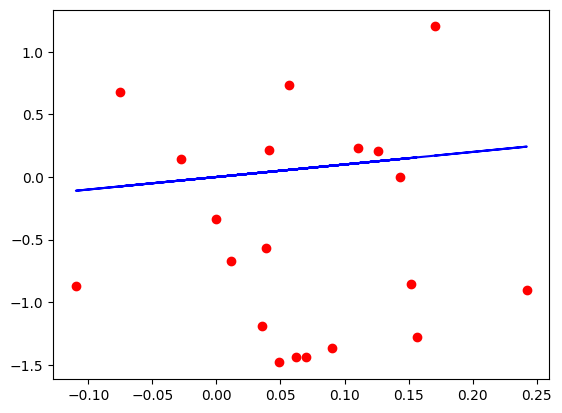

Tree_Cover_Loss_percent         : 0.0074
GDP_Billion_USD                 : 0.0055
Rainfall_mm                     : 0.0031
Year                            : 0.0016
International_Aid_Million_USD   : 0.0007
CO2_per_Capita                  : -0.0018
Country                         : -0.0028
Illegal_Corrupt                 : -0.0035
Deforestation_Policy_Strictness : -0.0095
Agriculture_Land_Percent        : -0.0127
Protected_Areas_Percent         : -0.0265

For Fold 5:
Best Parameters {'C': 1, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}
1.0115926599166702
0.8367285721045258
1.0057796279089521
-0.557092761599405


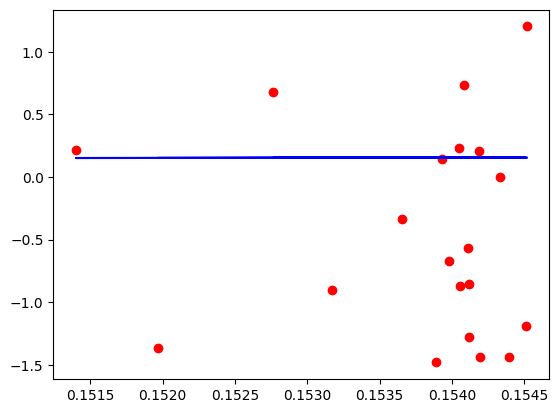

Rainfall_mm                     : 0.0009
GDP_Billion_USD                 : 0.0005
Deforestation_Policy_Strictness : 0.0003
Agriculture_Land_Percent        : 0.0002
CO2_per_Capita                  : -0.0001
Protected_Areas_Percent         : -0.0001
Country                         : -0.0005
Tree_Cover_Loss_percent         : -0.0005
Year                            : -0.0008
Illegal_Corrupt                 : -0.0013
International_Aid_Million_USD   : -0.0041



In [6]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

for f,(train_index,test_index) in enumerate(kf.split(x,y)):
  print(f"For Fold {f+1}:")
  x_train,x_test = x.iloc[train_index],x.iloc[test_index]
  svr2 = SVR()
  parameters = {
      'kernel':['linear','poly','rbf'],
      'C':[0.1,1,5,10],
      'gamma':['scale','auto',0.1,1,10],
      'epsilon':[0.1,0.5,1,10]
  }
  grid = GridSearchCV(svr2,parameters,cv=5,scoring='neg_mean_squared_error')
  grid.fit(x_train,y_train)
  print("Best Parameters",grid.best_params_)
  best_model = grid.best_estimator_
  y_pred2 = best_model.predict(x_test)

  print(mean_squared_error(y_test,y_pred2))
  print(mean_absolute_error(y_test,y_pred2))
  print(root_mean_squared_error(y_test,y_pred2))
  print(r2_score(y_test,y_pred2))
  plt.scatter(y_pred2,y_test,color='red')
  plt.plot(y_pred2,y_pred2,color='blue')
  plt.show()

  result = permutation_importance(best_model, x_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)
  feature_names = x_test.columns.tolist()
  for i in result.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]:<32}: {result.importances_mean[i]:.4f}")
  print()

## Assignment Summary
After some data preprocessing and feature engineering, data is feeded to my first model, which is a basic Support Vector Regression using linear kernel and constant parameters. This model is used to predict the forest area loss per km using all other values. The scores achieved by this model is given below;

### Simple Model
1. MSE: 1.472310530001805
2. MAE: 0.9925444593987374
3. RMSE: 1.2133880376869572
4. R2: -1.2662521783039038

The score of this model is worse than an average model. Thus my second model, used multiple kernels and variable parameters for the better results. Used K-Fold validation to test different type of datas. Result of my model in those models are;

### Better Model
#### Fold 1
1. MSE: 1.0111023562484198
2. MAE: 0.8364269219709154
3. RMSE: 1.0055358552773839
4. R2: -0.5563380622791456

#### Fold 2
1. MSE: 2.9523588431130143
2. MAE: 1.2666530691639115
3. RMSE: 1.7182429522954588
4. R2: -3.544414729772706

#### Fold 3
1. MSE: 1.050313644783057
2. MAE: 0.8681800135188229
3. RMSE: 1.0248481081521579
4. R2: -0.6166939900844135

#### Fold 4
1. MSE: 0.9272378517982991
2. MAE: 0.816238844645628
3. RMSE: 0.9629319040297185
4. R2: -0.42724972661925587

#### Fold 5
1. MSE: 1.0115926599166702
2. MAE: 0.8367285721045258
3. RMSE: 1.0057796279089521
4. R2: -0.557092761599405

From these scores it is understandable the second model is somewhat better than the previous one. Datas are very much different for each folds as the results are different for each one. Looks like training data in fold 2 contains lot of noise as it's scores look way worse than other fold results. As Insights there are lot of things to taken care;

Features like rainfall cannot be controlled by any method, while excessive or less rainfall completely affects the Forest area. As a human measure, increasing agriculture land is affecting the Forest area. Must ensure a better deforestation policy as it increases percentage of forest area protected resulting in increasing the Forest area.



